# ADS 509 Politics Project: Tokenization, Normalization, Descriptive Statistics 

In [17]:
# Some of the pre-loaded imports
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from string import punctuation

In [18]:
# Additional import statements made here
np.int = np.int_
np.float = np.float_
import nltk
import zipfile
import shutil
import html
import matplotlib
import matplotlib.pyplot as plt

#first, download the stopwords.zip file from https://www.nltk.org/nltk_data/ and then extract it
source_dir = '/Users/calebmccurdy/downloads/stopwords'
dest_dir = '/Users/calebmccurdy/nltk_data/corpora/stopwords'

if os.path.exists(dest_dir):
    shutil.rmtree(dest_dir)
shutil.move(source_dir, dest_dir)

#first, download the punkt.zip file from https://www.nltk.org/nltk_data/ and then extract it
punkt_source_dir = '/Users/calebmccurdy/downloads/punkt'
punkt_dest_dir = '/Users/calebmccurdy/nltk_data/corpora/punkt'

if os.path.exists(punkt_dest_dir):
    shutil.rmtree(punkt_dest_dir)
shutil.move(punkt_source_dir, punkt_dest_dir)

'/Users/calebmccurdy/nltk_data/corpora/punkt'

In [19]:
# Final remaining pre-loaded imports
from nltk.corpus import stopwords
sw = stopwords.words("english")

In [20]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/calebmccurdy/Desktop/USD/ADS 509/Project/"

# This subfolder should still work if stored correctly from scraping notebook
politics_folder = "politics/"

In [21]:
def descriptive_stats(tokens, num_most_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = len(set(tokens)) / len(tokens)
    num_characters = sum(len(token) for token in tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")

        counter = Counter(tokens)
        most_common_tokens = counter.most_common(num_most_tokens)
        print(f"Five most common tokens: {most_common_tokens}")
    
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [22]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
Five most common tokens: [('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1)]


## Data Input

In [23]:
# Read in the politics data

# Define path to the politics folder
politics_folder_path = os.path.join(data_location, politics_folder)

# Dictionary to store news data
news_data = {}

# Loop through each site subfolder in the politics folder
for site_folder in os.listdir(politics_folder_path):
    site_path = os.path.join(politics_folder_path, site_folder)

    # Check if it's a directory
    if os.path.isdir(site_path):
        org = site_folder
        news_data.setdefault(org, {})
        # Loop through each txt file in the site subfolder
        for file_name in os.listdir(site_path):
        
            # Extract song name from the file name
            article = os.path.splitext(file_name)[0]
            file_path = os.path.join(site_path, file_name)
                
            # Read the entire text data from the file
            # https://www.dataquest.io/blog/read-file-python/ 
            with open(file_path, 'r', encoding='latin-1') as file:
                text_data = file.read()
                news_data[org][article] = text_data

# Now, we have the newss data in the 'news_data' dictionary with org and article names as keys.

In [24]:
# Set a counter for limiting the number of entries to print
counter = 0

# Loop through each organization in the news_data dictionary
for org, articles in news_data.items():
    print(f"\nOrganization: {org}")
    
    # Loop through each article in the organization
    for article, text_data in articles.items():
        print(f"Article: {article}\nText Data:\n{text_data}\n")
        
        # Increment the counter
        counter += 1
        
        # Check if the counter reaches the limit (e.g., 2)
        if counter >= 2:
            break
    
    # Check if the counter reaches the limit (e.g., 2)
    if counter >= 2:
        break



Organization: FOX
Article: haley-blames-trump-gop-loss-key-special-election-south-carolina-showdown-intensifies
Text Data:
Haley blames Trump for GOP loss in key special election as South Carolina showdown intensifies


      This material may not be published, broadcast, rewritten,
      or redistributed. Â©2024 FOX News Network, LLC. All rights reserved.
      Quotes displayed in real-time or delayed by at least 15 minutes. Market data provided by
      
Factset
. Powered and implemented by
      
FactSet Digital Solutions
.
      
Legal Statement
. Mutual Fund and ETF data provided by
      
Refinitiv Lipper
.
    
Fox News' Trace Gallagher reports on the outcome of New York's special election.
Tuesday night's setback for the GOP in a closely watched 
special congressional election
 in the suburbs of New York City armed Republican presidential contender Nikki Haley with more ammunition against frontrunner, former President Trump.
"Letâs just say the quiet part out loud. Donald Tr

## Data Cleaning

Now clean and tokenize your data. Remove punctuation characters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 

In [44]:
punctuation = set(punctuation) # speeds up comparison
extra_sw = ['cnn', 'fox', 'news', 'said', 'told', 'would', 'read', 'get', 'could', 'also',
            'think', 'time', 'even', 'former', 'ask', 'asked', 'â']
sw.extend(extra_sw)

In [53]:
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [45]:
def clean_news(text):
    # remove punctuation characters
    text = ''.join([char for char in text if char not in punctuation])
    # fold to lowercase
    text = text.lower()
    # remove stopwords
    text = ' '.join([word for word in text.split() if word.lower() not in sw])
    # remove extra white spaces
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()

In [46]:
# Albrecht, J., Ramachandran, S., & Winkler, C. (2020). Blueprints for text analytics using Python. O'Reilly. 
RE_TOKEN = re.compile(r"""
               ( [#]?[@\w''\.\-\:]*\w     # words, hash tags and email adresses
               | [:;<]\-?[\)\(3]          # coarse pattern for basic text emojis
               | [\U0001F100-\U0001FFFF]  # coarse code range for unicode emojis
               )
               """, re.VERBOSE)

def tokenize(text):
    return RE_TOKEN.findall(text)

In [47]:
# create your clean news data here
cleaned_news_data = {}

# Clean and tokenize news data
for org, article in news_data.items():
    cleaned_news_data[org] = {}
    for article, text in article.items():
        cleaned_text = clean_news(text)
        tokens = tokenize(cleaned_text)
        cleaned_news_data[org][article] = tokens

In [48]:
# Set a counter for limiting the number of entries to print
counter = 0

# Loop through each organization in the news_data dictionary
for org, articles in cleaned_news_data.items():
    print(f"\nOrganization: {org}")
    
    # Loop through each article in the organization
    for article, text_data in articles.items():
        print(f"Article: {article}\nText Data:\n{text_data}\n")
        
        # Increment the counter
        counter += 1
        
        # Check if the counter reaches the limit (e.g., 2)
        if counter >= 2:
            break
    
    # Check if the counter reaches the limit (e.g., 2)
    if counter >= 2:
        break


Organization: FOX
Article: haley-blames-trump-gop-loss-key-special-election-south-carolina-showdown-intensifies
Text Data:
['haley', 'blames', 'trump', 'gop', 'loss', 'key', 'special', 'election', 'south', 'carolina', 'showdown', 'intensifies', 'material', 'may', 'published', 'broadcast', 'rewritten', 'redistributed', 'â', '2024', 'network', 'llc', 'rights', 'reserved', 'quotes', 'displayed', 'realtime', 'delayed', 'least', '15', 'minutes', 'market', 'data', 'provided', 'factset', 'powered', 'implemented', 'factset', 'digital', 'solutions', 'legal', 'statement', 'mutual', 'fund', 'etf', 'data', 'provided', 'refinitiv', 'lipper', 'trace', 'gallagher', 'reports', 'outcome', 'new', 'yorks', 'special', 'election', 'tuesday', 'nights', 'setback', 'gop', 'closely', 'watched', 'special', 'congressional', 'election', 'suburbs', 'new', 'york', 'city', 'armed', 'republican', 'presidential', 'contender', 'nikki', 'haley', 'ammunition', 'frontrunner', 'president', 'trump', 'letâ', 's', 'say', 'qu

In [64]:
df = pd.DataFrame([(org, article, tokens) for org, articles in cleaned_news_data.items() for article, tokens in articles.items()],
                  columns=['Organization', 'Article', 'Tokens'])
df.to_csv('/Users/calebmccurdy/Desktop/USD/ADS 509/Project/Politics_Project.csv', index=False)

df

,Organization,Article,Tokens
0,FOX,haley-blames-trump-gop-loss-key-special-electi...,"[haley, blames, trump, gop, loss, key, special..."
1,FOX,biden-says-his-memory-fine-he-most-qualified-p...,"[biden, says, memory, fine, qualified, person,..."
2,FOX,nikki-haley-calls-robert-hur-report-unbelievab...,"[nikki, haley, calls, robert, hur, report, unb..."
3,FOX,dnc-alleges-rfk-jr-campaign-violating-election...,"[dnc, alleges, rfk, jr, campaign, violating, e..."
4,FOX,border-impeachment-courts-gridlock-reigns-wash...,"[border, impeachment, courts, gridlock, reigns..."
...,...,...,...
126,CNN,_2024_02_13new-york-special-election-what-to-w...,"[watch, new, yorkâ, s, highstakes, house, spec..."
127,CNN,_2024_02_08biden-special-counsel-beau-death_index,"[biden, slams, special, counsel, hur, raising,..."
128,CNN,_2024_02_12cq-brown-nato-trump_index,"[joint, chiefs, chairman, says, â, us, credibi..."
129,CNN,_2024_02_14new-york-special-election-takeaways...,"[takeaways, new, yorkâ, s, highstakes, special..."


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both the organizations data. 

In [52]:
for org, articles in cleaned_news_data.items():
    org_tokens = [tokens for article, tokens in articles.items()]
    all_org_tokens = [token for sublist in org_tokens for token in sublist]
    print(f"\nDescriptive Stats for News - Org: {org}")
    descriptive_stats(all_org_tokens, verbose=True)


Descriptive Stats for News - Org: FOX
There are 21068 tokens in the data.
There are 4504 unique tokens in the data.
There are 134661 characters in the data.
The lexical diversity is 0.214 in the data.
Five most common tokens: [('biden', 416), ('â', 260), ('president', 232), ('2024', 167), ('s', 159)]

Descriptive Stats for News - Org: CNN
There are 52407 tokens in the data.
There are 8969 unique tokens in the data.
There are 322454 characters in the data.
The lexical diversity is 0.171 in the data.
Five most common tokens: [('â', 1724), ('s', 1301), ('trump', 661), ('biden', 510), ('president', 396)]


In [56]:
print("CNN News Stats\n")

descriptive_stats(
    [token for tokens in df[df['Organization'] == 'CNN']['Tokens']for token in tokens])

print('\n')
print("FoxNews Stats\n")

descriptive_stats(
    [token for tokens in df[df['Organization'] == 'FOX']['Tokens']for token in tokens])

CNN News Stats

There are 52407 tokens in the data.
There are 8969 unique tokens in the data.
There are 322454 characters in the data.
The lexical diversity is 0.171 in the data.
Five most common tokens: [('â', 1724), ('s', 1301), ('trump', 661), ('biden', 510), ('president', 396)]


FoxNews Stats

There are 21068 tokens in the data.
There are 4504 unique tokens in the data.
There are 134661 characters in the data.
The lexical diversity is 0.214 in the data.
Five most common tokens: [('biden', 416), ('â', 260), ('president', 232), ('2024', 167), ('s', 159)]


[21068, 4504, 0.21378393772546042, 134661]

### Article lengths

Organization
CNN    Axes(0.125,0.11;0.775x0.77)
FOX    Axes(0.125,0.11;0.775x0.77)
Name: data_length, dtype: object

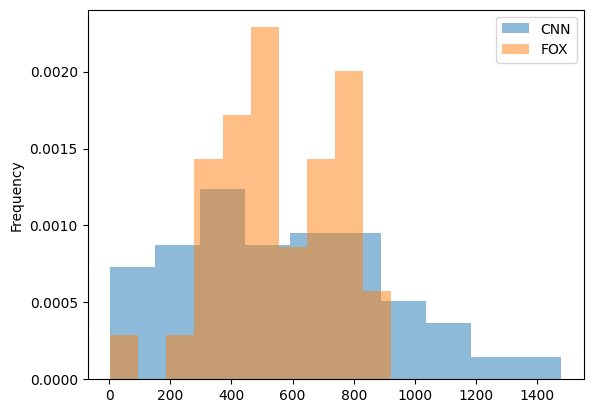

In [61]:
# Your lyric length comparison chart here. 

data_length = {}
for org, articles in cleaned_news_data.items():
    data_length[org] ={}
    for article, text_data in articles.items():
        article_length = len(text_data)
        data_length[org][article] = article_length

length_df = pd.DataFrame([(org, article_len) for org, articles in data_length.items() for article, article_len in articles.items()], columns=['Organization', 'data_length'])

# all histograms together
length_df.groupby('Organization')['data_length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

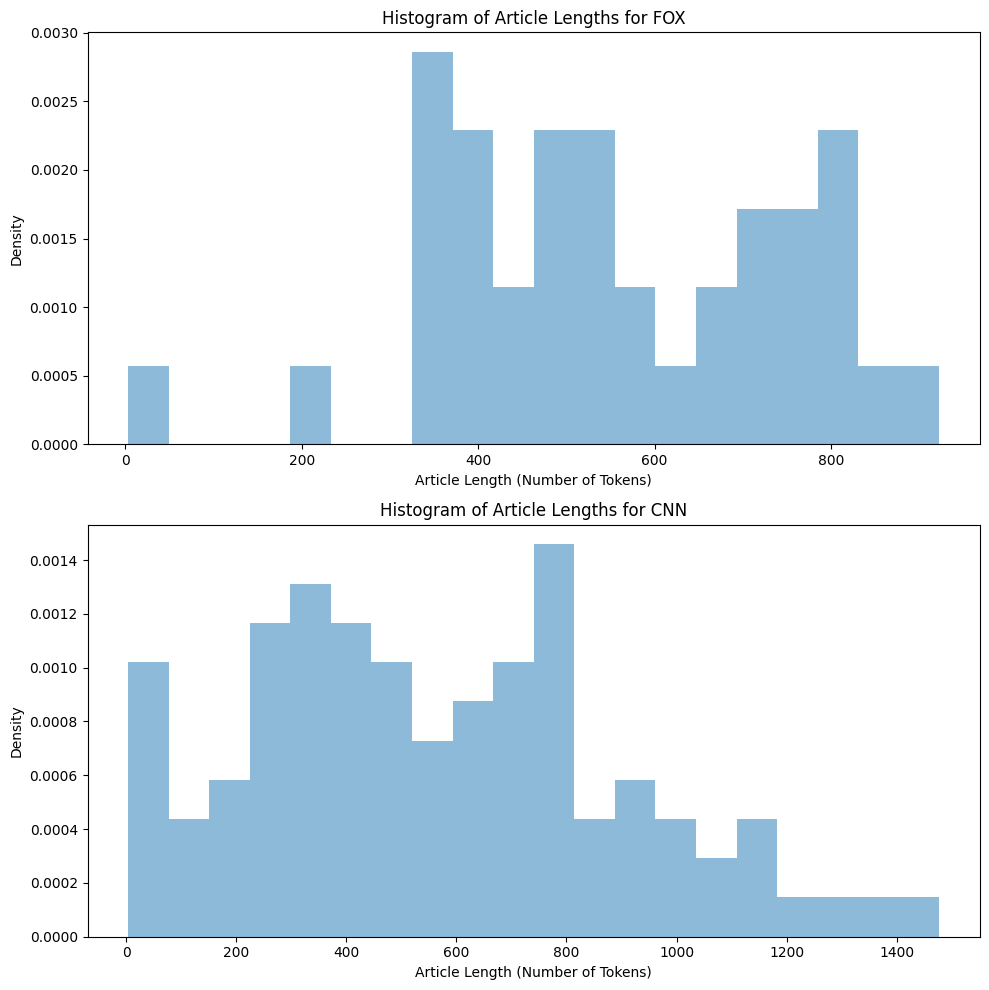

In [63]:
# Create subplots for each artist
orgs = length_df['Organization'].unique()
fig, axes = plt.subplots(nrows=len(orgs), figsize=(10, 5 * len(orgs)))

# Plot individual histograms for each artist
for ax, org in zip(axes, orgs):
    org_data = length_df[length_df['Organization'] == org]
    ax.hist(org_data['data_length'], bins=20, density=True, alpha=0.5)
    ax.set_title(f'Histogram of Article Lengths for {org}')
    ax.set_xlabel('Article Length (Number of Tokens)')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()